 # Fish Weight Modeling for Market Insights

In [1]:
from sklearn.linear_model import LinearRegression  #used for regression and class
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Task 1 — Data acquisition and preparation

In [2]:
path = "Fish.csv"
df = pd.read_csv(path)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [8]:
df.columns.tolist()

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [9]:
(df['Weight'] <= 0).sum()

np.int64(1)

In [10]:
df[df['Weight'] > 0].reset_index(drop=True)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
153,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
154,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
155,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
156,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [11]:
df.shape

(159, 7)

### keep both versions: a numeric-encoded label column (for tree-based or quick checks)
### and a one-hot encoded matrix through ColumnTransformer in modeling pipelines.

In [12]:
cat_col = 'Species'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species_label'] = le.fit_transform(df[cat_col])
print('\nSpecies mapping (label encoding):')
print(dict(zip(le.classes_, le.transform(le.classes_))))


Species mapping (label encoding):
{'Bream': np.int64(0), 'Parkki': np.int64(1), 'Perch': np.int64(2), 'Pike': np.int64(3), 'Roach': np.int64(4), 'Smelt': np.int64(5), 'Whitefish': np.int64(6)}


### Split dataset into features and target, then into training and testing sets (stratify by species to preserve distribution).

In [13]:
X = df.drop(columns=['Weight'])
y = df['Weight']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['Species'])
print(X_train.shape,  X_test.shape)

(127, 7) (32, 7)


# Task 2 — Exploratory Data Analysis & Feature Engineering

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142
Species_label,159.0,2.264151,1.704249,0.0000,1.00000,2.0000,3.5000,6.000


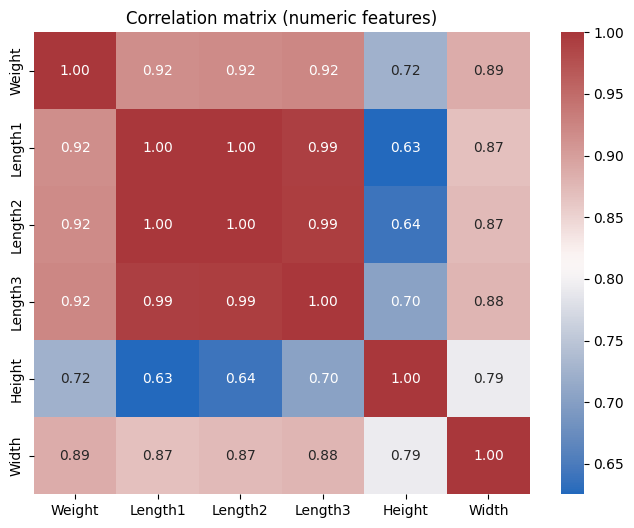

In [16]:
# Correlation matrix (numeric only)
num_cols = ['Weight','Length1','Length2','Length3','Height','Width']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation matrix (numeric features)')
plt.show()

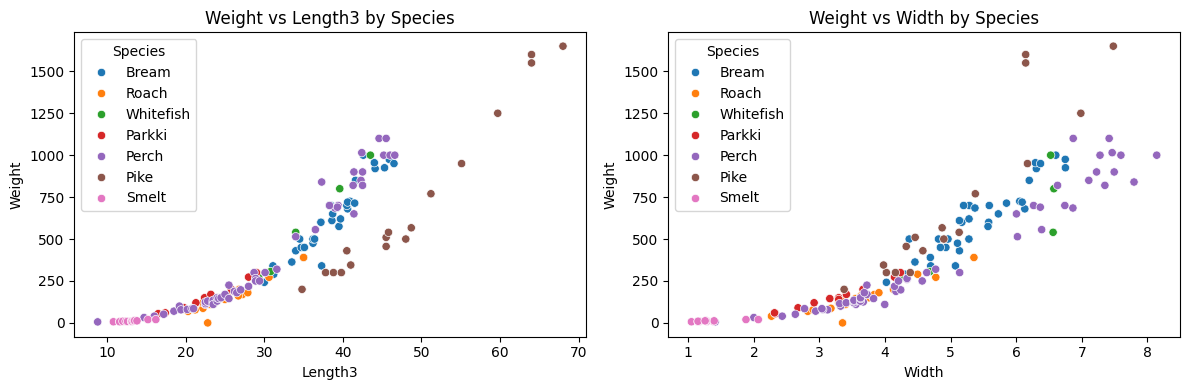

In [17]:
# Scatter plots: Weight vs Length3 and Weight vs Width for quick checks
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.scatterplot(data=df, x='Length3', y='Weight', hue='Species', ax=axes[0])
axes[0].set_title('Weight vs Length3 by Species')

sns.scatterplot(data=df, x='Width', y='Weight', hue='Species', ax=axes[1])
axes[1].set_title('Weight vs Width by Species')
plt.tight_layout()
plt.show()

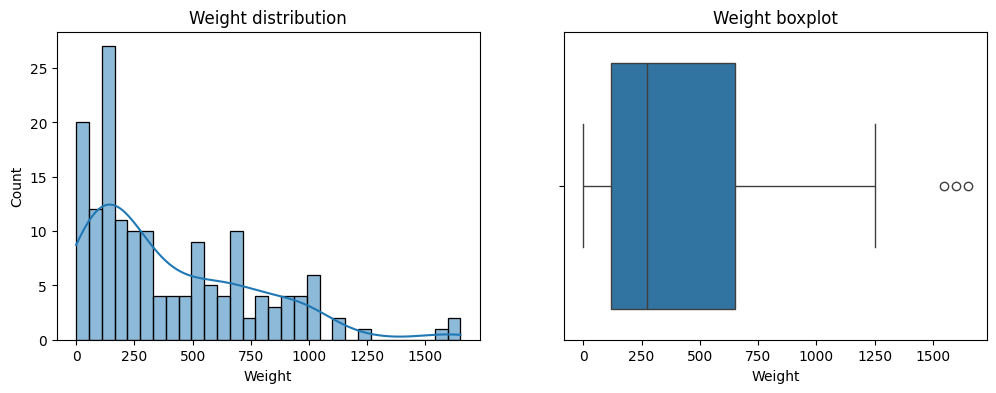

In [18]:
# Histograms & boxplots for Weight
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['Weight'], bins=30, kde=True)
plt.title('Weight distribution')


plt.subplot(1,2,2)
sns.boxplot(x=df['Weight'])
plt.title('Weight boxplot')
plt.show()

### Outlier detection & handling

In [19]:
# flag outliers in Weight using the IQR method and show how many would be removed.
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['Weight'] < lower) | (df['Weight'] > upper)]
print(f"\nIQR method: {len(outliers)} outliers detected (Weight) — indices:\n", outliers.index.tolist())





IQR method: 3 outliers detected (Weight) — indices:
 [142, 143, 144]


### Feature engineering
 Create mean length and interaction terms
##### Length_mean = mean of Length1, Length2, Length3
##### LW_interaction = Length3 * Width
##### Height_ratio = Height / Length3

In [20]:
for dataset in [X_train, X_test]:
    dataset['Length_mean'] = dataset[['Length1','Length2','Length3']].mean(axis=1)
    dataset['LW_interaction'] = dataset['Length3'] * dataset['Width']
    dataset['Height_ratio'] = dataset['Height'] / dataset['Length3']


# Show new features correlation with Weight (on the full df variant)
df['Length_mean'] = df[['Length1','Length2','Length3']].mean(axis=1)
df['LW_interaction'] = df['Length3'] * df['Width']
df['Height_ratio'] = df['Height'] / df['Length3']
print('\nCorrelations of engineered features with Weight:')
print(df[['Weight','Length_mean','LW_interaction','Height_ratio']].corr()['Weight'].sort_values(ascending=False))


Correlations of engineered features with Weight:
Weight            1.000000
LW_interaction    0.975226
Length_mean       0.920817
Height_ratio      0.191619
Name: Weight, dtype: float64


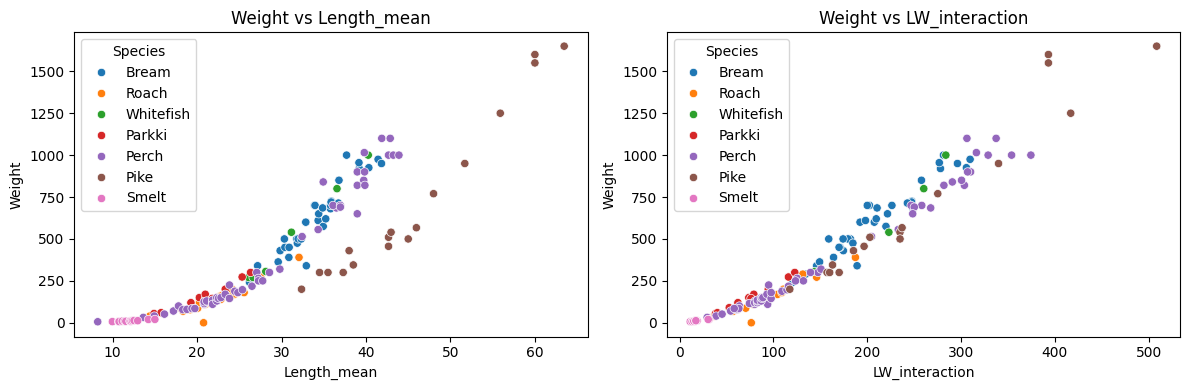

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Length_mean', y='Weight', hue='Species')
plt.title('Weight vs Length_mean')


plt.subplot(1,2,2)
sns.scatterplot(data=df, x='LW_interaction', y='Weight', hue='Species')
plt.title('Weight vs LW_interaction')
plt.tight_layout()
plt.show()

# Task 3 — Model development and comparison

### define two pre-processing pipelines:
#### 1) numeric pipeline: StandardScaler for numeric features
#### 2) categorical pipeline: OneHotEncoder for Species

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [23]:
num_features = ['Length1','Length2','Length3','Height','Width','Length_mean','LW_interaction','Height_ratio']
cat_features = ['Species']


numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[
('num', numeric_transformer, num_features),
('cat', cat_transformer, cat_features)
])

In [24]:
def evaluate_model(model, X_test, y_test, description=''):
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    print(f"{description} RMSE: {rmse:.3f}, R2: {r2:.3f}")
    return rmse, r2, preds


X_train_pipe, X_test_pipe = X_train.copy(), X_test.copy()
for i in num_features:
    if i not in X_train_pipe: 
        X_train_pipe[i] = 0
    if i not in X_test_pipe: 
        X_test_pipe[i] = 0


# Linear Regression
lin_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
lin_pipe.fit(X_train_pipe, y_train)
lin_rmse, lin_r2, lin_preds = evaluate_model(lin_pipe, X_test_pipe, y_test, 'LinearRegression')


# Ridge Regression
ridge_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())])
param_grid = {'regressor__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_search = GridSearchCV(ridge_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_search.fit(X_train_pipe, y_train)
print('Ridge best params:', ridge_search.best_params_)
ridge_rmse, ridge_r2, ridge_preds = evaluate_model(ridge_search.best_estimator_, X_test_pipe, y_test, 'Ridge')


# Lasso Regression
lasso_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso(max_iter=10000))])
param_grid = {'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
lasso_search = GridSearchCV(lasso_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train_pipe, y_train)
print('Lasso best params:', lasso_search.best_params_)
lasso_rmse, lasso_r2, lasso_preds = evaluate_model(lasso_search.best_estimator_, X_test_pipe, y_test, 'Lasso')


# Polynomial Regression (degree=2) --->allows quadratic terms and pairwise feature interactions which can capture many realistic nonlinear relationships in biological data like fish growth without exploding feature count.
poly_pipe = Pipeline(steps=[
('preprocessor', preprocessor),
('poly', PolynomialFeatures(degree=2, include_bias=False)),
('scaler2', StandardScaler()),
('reg', Ridge(alpha=1.0))
])
param_grid = {'reg__alpha': [0.01, 0.1, 1, 10]}
poly_search = GridSearchCV(poly_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
poly_search.fit(X_train_pipe, y_train)
print('Polynomial best params:', poly_search.best_params_)
poly_rmse, poly_r2, poly_preds = evaluate_model(poly_search.best_estimator_, X_test_pipe, y_test, 'Polynomial(d=2)')

LinearRegression RMSE: 66.100, R2: 0.977
Ridge best params: {'regressor__alpha': 0.1}
Ridge RMSE: 65.643, R2: 0.977


C:\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.487e+04, tolerance: 1.127e+03
  model = cd_fast.enet_coordinate_descent(
C:\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e+05, tolerance: 1.121e+03
  model = cd_fast.enet_coordinate_descent(
C:\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+05, tolerance: 1.261e+03
  model = cd_fast.enet_

Lasso best params: {'regressor__alpha': 0.1}
Lasso RMSE: 66.186, R2: 0.977
Polynomial best params: {'reg__alpha': 10}
Polynomial(d=2) RMSE: 56.060, R2: 0.983


In [25]:
# Results summary
results = pd.DataFrame({
'model': ['LinearRegression','Ridge','Lasso','Polynomial(d=2)'],
'RMSE': [lin_rmse, ridge_rmse, lasso_rmse, poly_rmse],
'R2': [lin_r2, ridge_r2, lasso_r2, poly_r2]
})
results = results.sort_values('RMSE')
print(results)


best_model_idx = results['RMSE'].idxmin()
best_model_name = results.loc[best_model_idx, 'model']
print('Best model:', best_model_name)

              model       RMSE        R2
3   Polynomial(d=2)  56.060434  0.983325
1             Ridge  65.642947  0.977137
0  LinearRegression  66.099869  0.976818
2             Lasso  66.185978  0.976758
Best model: Polynomial(d=2)


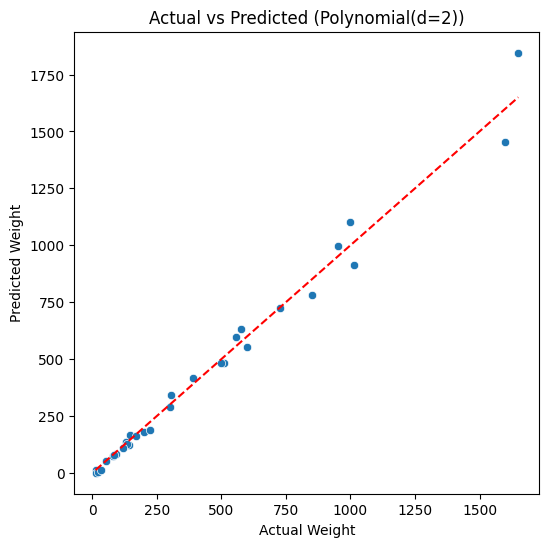

In [26]:
plt.figure(figsize=(6,6))
preds = {'LinearRegression':lin_preds,'Ridge':ridge_preds,'Lasso':lasso_preds,'Polynomial(d=2)':poly_preds}[best_model_name]
sns.scatterplot(x=y_test, y=preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title(f'Actual vs Predicted ({best_model_name})')
plt.show()